In [8]:
# Load libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [87]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.10.4


In [86]:
# load dataset
data = pd.read_csv("Dataset/Dropout_Academic Success - Sheet1.csv")
# data.Target = data.Target.replace({'Dropout':0,'Graduate':1,"Enrolled":2})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [11]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
for i in data.columns:
    print(i,end=",")

Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,

In [56]:
numerical = []
numerical.append("Previous qualification (grade)")
numerical.append("Admission grade")
numerical.append("Unemployment rate")
numerical.append("Inflation rate")
numerical.append("GDP")

In [75]:
catagorical = []
catagorical = data.columns.to_list()
for i in numerical:
    catagorical.remove(i)
print (catagorical)


<class 'list'>
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Target']


In [62]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


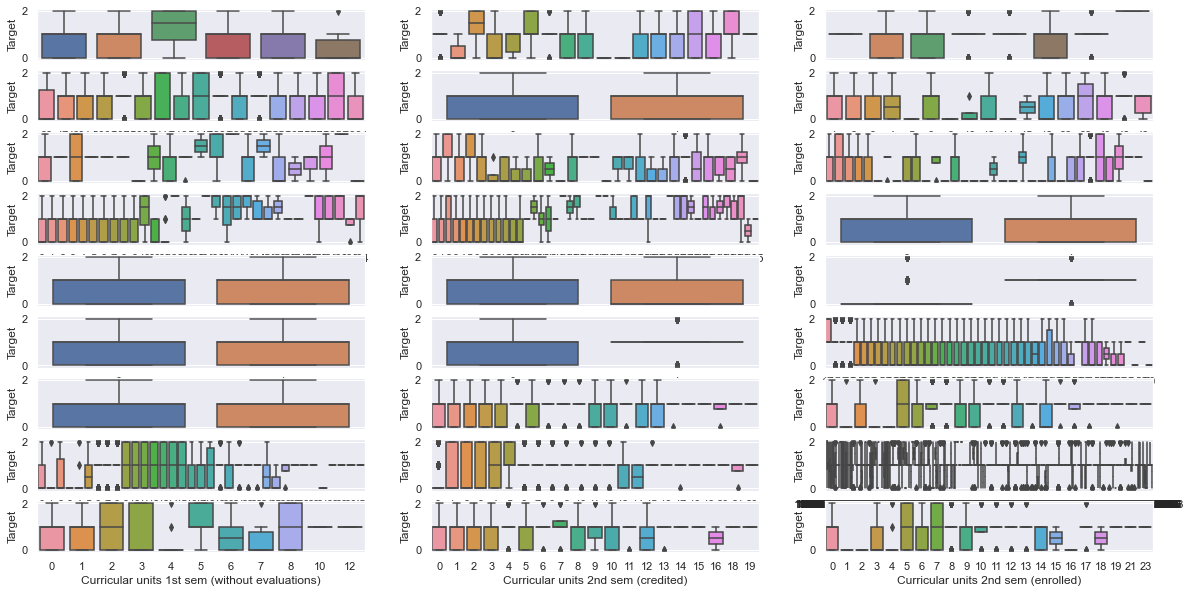

In [84]:

fig, ax = plt.subplots(9, 3, figsize=(20, 10))
for var, subplot in zip(catagorical, ax.flatten()):
    sns.boxplot(x=var, y='Target', data=data, ax=subplot)

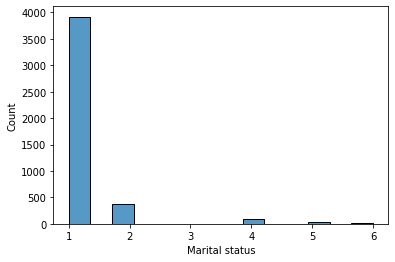

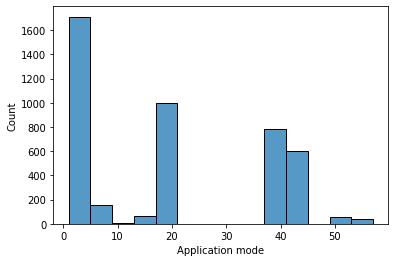

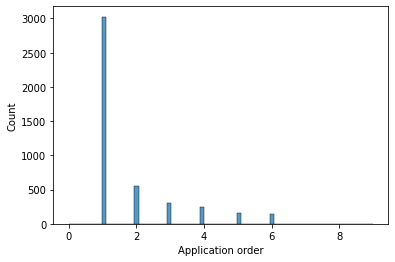

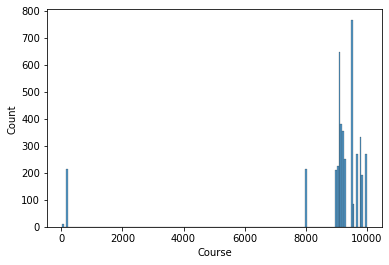

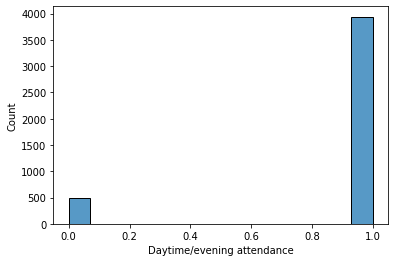

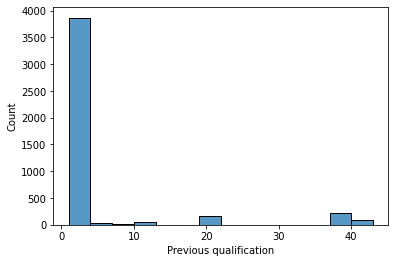

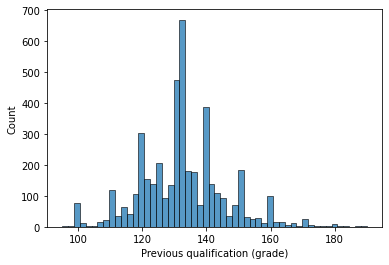

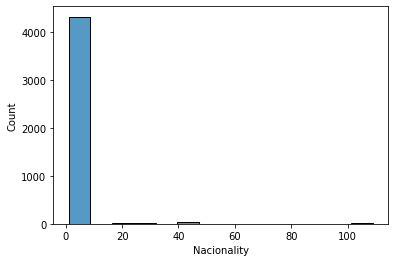

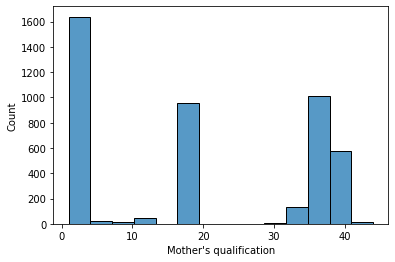

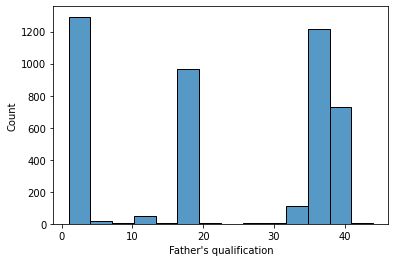

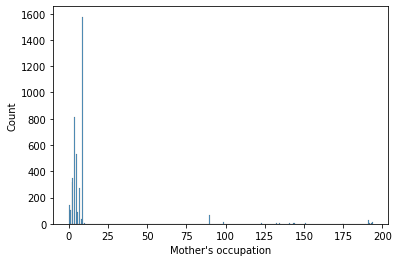

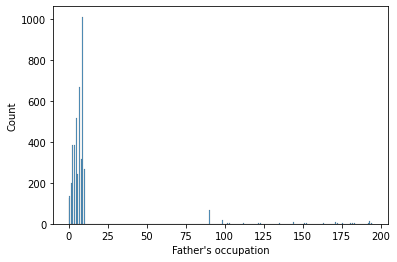

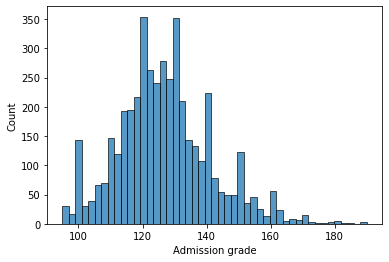

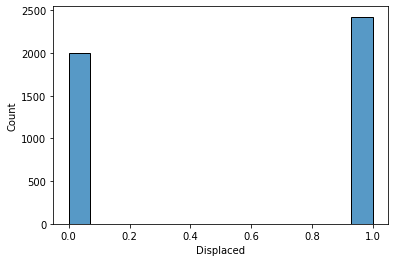

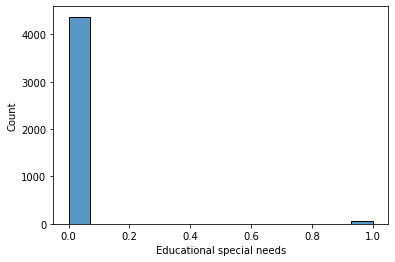

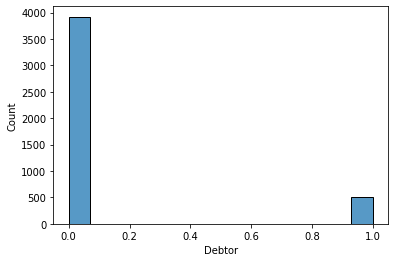

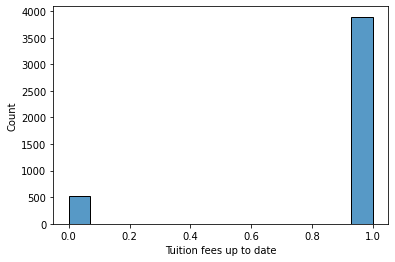

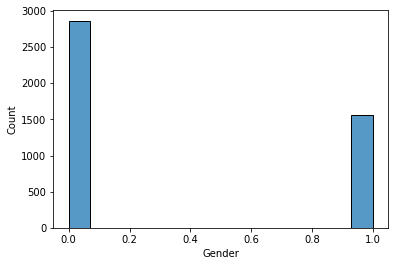

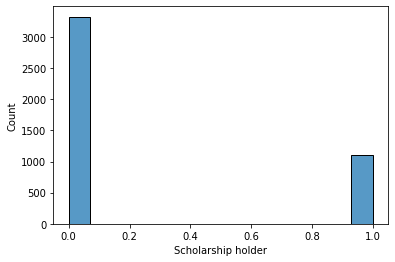

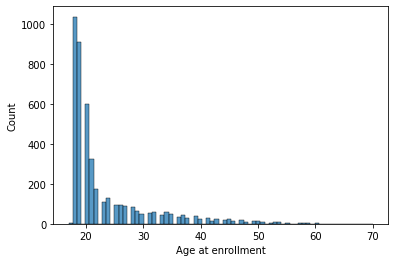

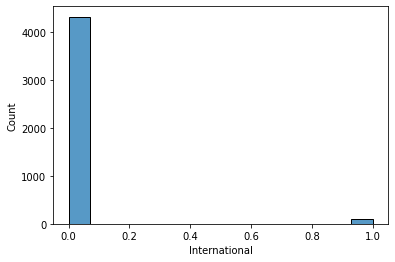

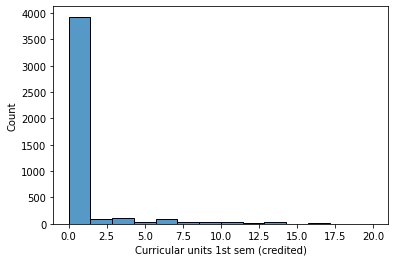

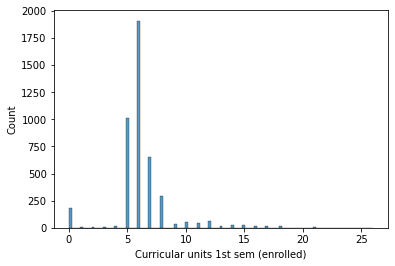

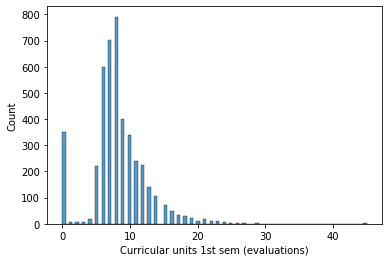

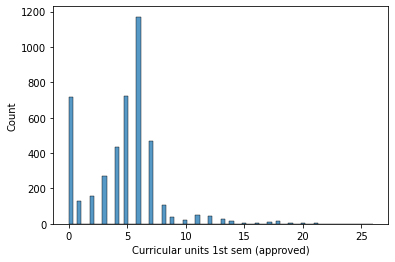

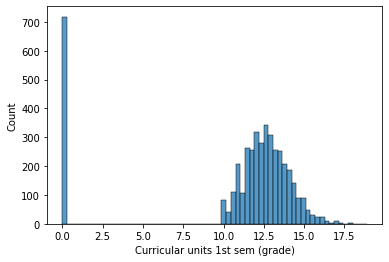

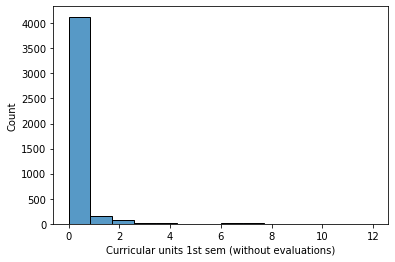

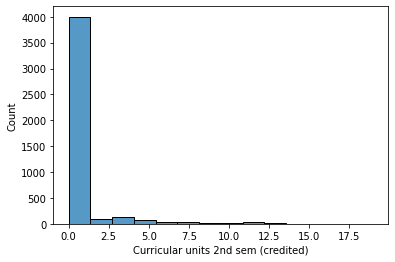

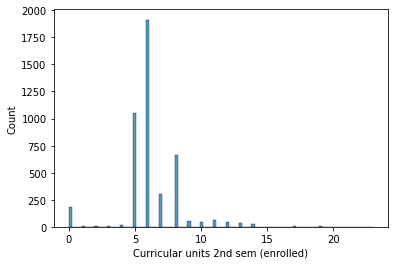

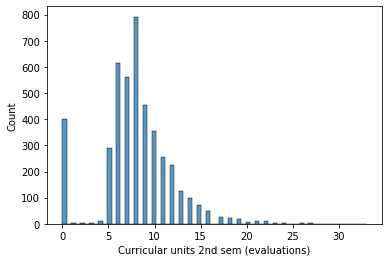

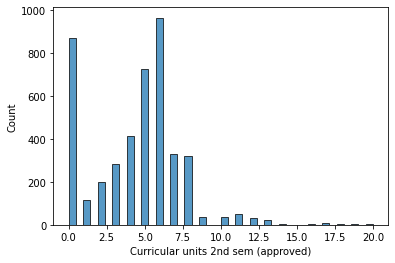

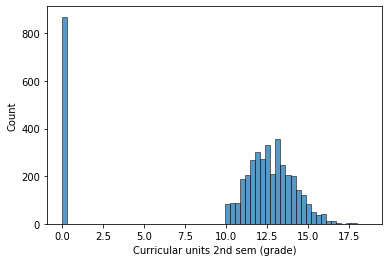

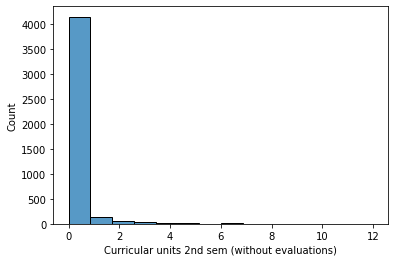

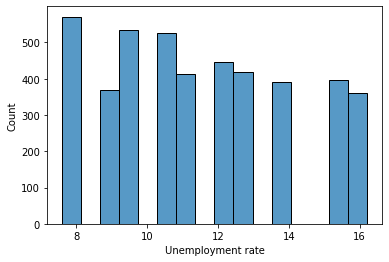

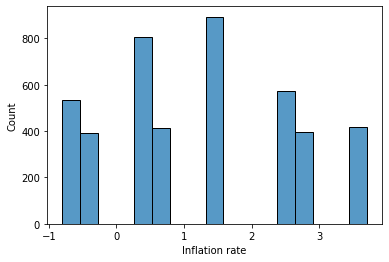

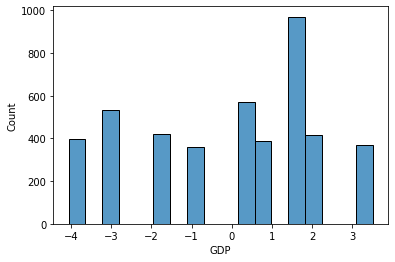

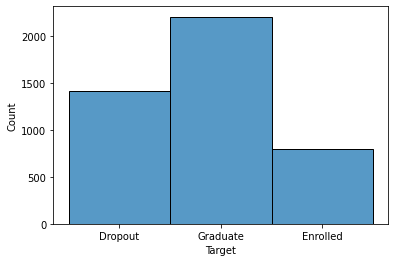

In [13]:
# histogram of the given dataset
# Feature vs their count
for i in data.columns:
    sns.histplot(x=data[i],fill=True)
    plt.show()


<AxesSubplot:xlabel='Marital status'>

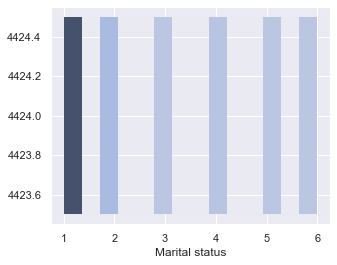

In [53]:
sns.histplot(x=data["Marital status"],y=data["Target"].count(),fill=True)

In [14]:
# sns.histplot(data=data)

In [15]:
data.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [16]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [17]:
target_labels_before = data['Target'] 

In [18]:
data['Target'] = data["Target"].map({"Graduate" :1, "Dropout" :0, "Enrolled" :2}).astype(int) #mapping numbers
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [19]:
target_labels_after = data['Target']

In [20]:
feature_cols = data.columns[:-1]

X = data[feature_cols] # Features
y = data.Target # Target variable

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7175141242937854


In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7242937853107345


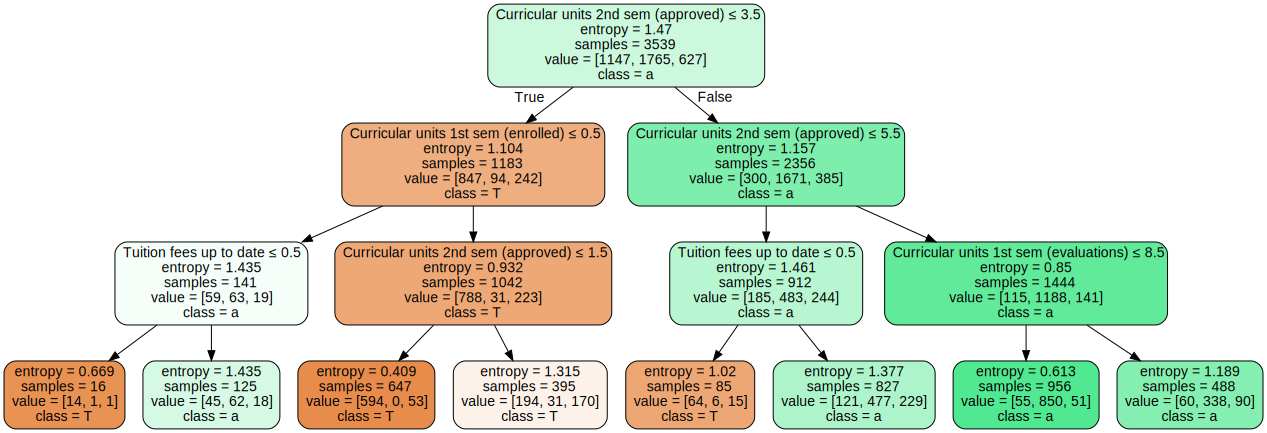

In [25]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,class_names='Target',
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Result") 
graph 

## Optiizing Decision Tree Performance using ID3

In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7242937853107345


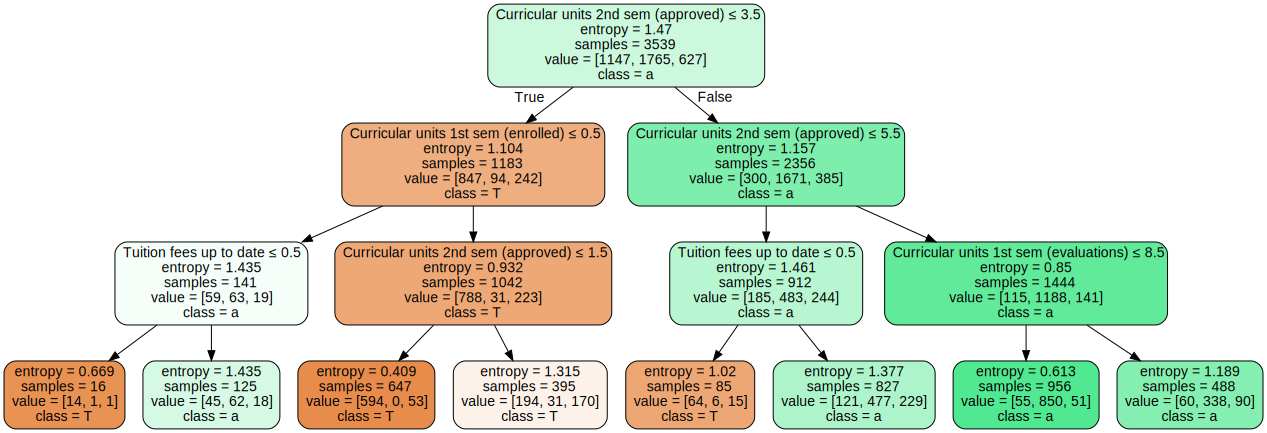

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,class_names='Target',
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Result") 
graph 

## Optiizing Decision Tree Performance using Gini-Impurity 

In [28]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7175141242937854


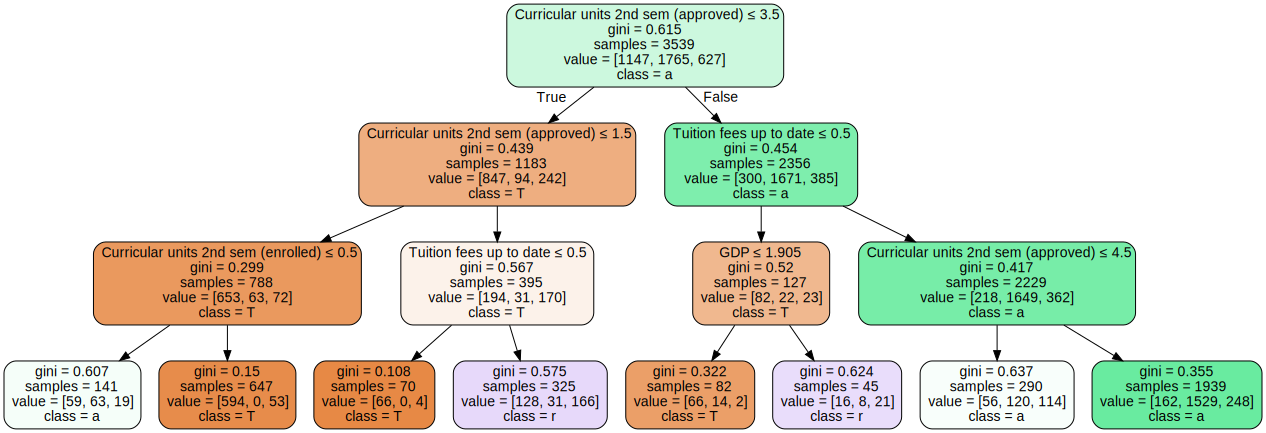

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,class_names='Target',
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Result") 
graph 

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [50]:
def confusionMatrix(y_test,y_pred):
    c = confusion_matrix(y_test,y_pred)
    sns.set(font_scale=1.4) # for label size
    s = sns.heatmap(c, annot=True, cmap='Blues',annot_kws={"size": 40},fmt='g')
    s.set_title("Confusion Matrix")
    s.set_xlabel('0 = Dropout , 1 = Graduate , 2 = Enrolled')
    return s

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='0 = Dropout , 1 = Graduate , 2 = Enrolled'>

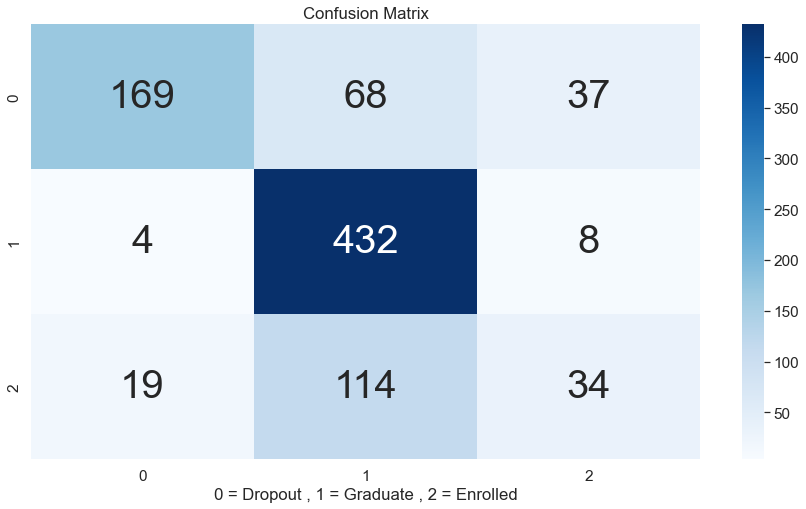

In [51]:
confusionMatrix(y_test,y_pred)

In [53]:
#Cross-calidation result
scores = cross_val_score(clf, X_train, y_train, cv=10)
pd.DataFrame(scores,columns=['Accuracy'])

,Accuracy
0,0.742938
1,0.745763
2,0.742938
3,0.720339
4,0.720339
5,0.731638
6,0.737288
7,0.748588
8,0.748588
9,0.733711


<AxesSubplot:>

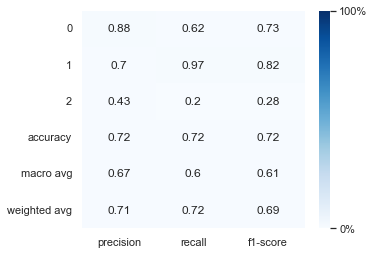

In [45]:
sns.set(rc = {'figure.figsize':(5,4)})
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).iloc[:-1,:].T, annot=True,cmap='Blues',cbar_kws={'format': '%.0f%%', 'ticks': [0, 100]},
            vmax=100,
            vmin=0)


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73       274
           1       0.70      0.97      0.82       444
           2       0.43      0.20      0.28       167

    accuracy                           0.72       885
   macro avg       0.67      0.60      0.61       885
weighted avg       0.71      0.72      0.69       885



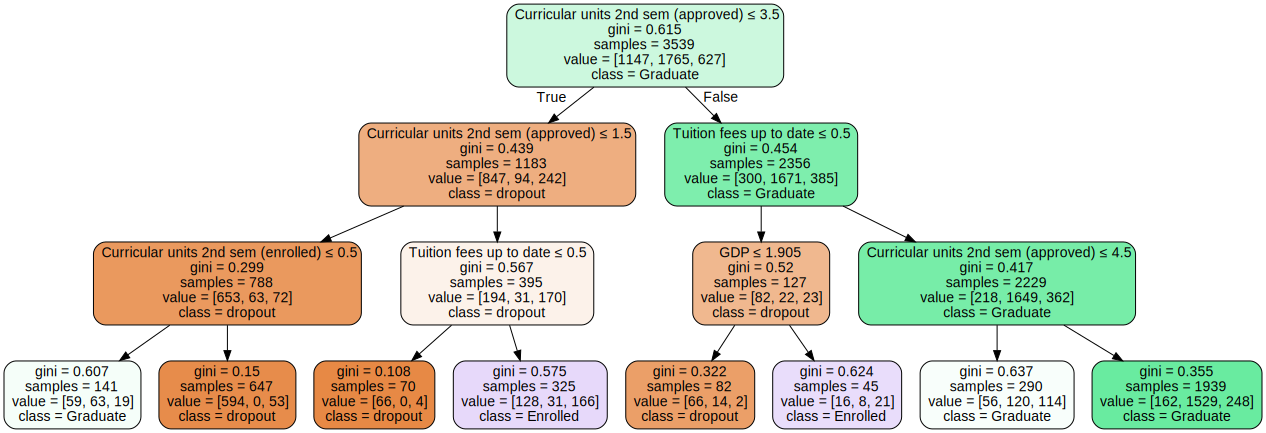

In [39]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,class_names=["dropout","Graduate","Enrolled"],
                     filled=True, rounded=True,  
                     special_characters=True,
                               impurity=True)  
graph = graphviz.Source(dot_data)  
graph.render("Result") 
graph 

In [29]:
from sklearn.model_selection import cross_val_score
fold = 10
scores = cross_val_score(clf, X, y, cv=fold)
print("Scores :",scores)
avg_scores = scores.sum()/fold
print("Average Accuracy :",avg_scores)

Scores : [0.73363431 0.74040632 0.73589165 0.73589165 0.74434389 0.72171946
 0.71719457 0.74434389 0.71266968 0.7081448 ]
Average Accuracy : 0.7294240217357998


D:\anaconda3\envs\CSE499\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

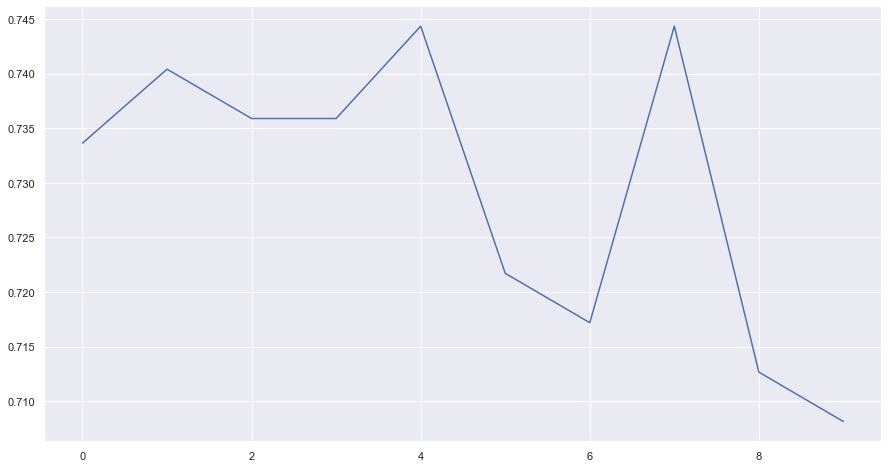

In [30]:
import seaborn as sns
sns.lineplot(range(fold),scores)

In [36]:
# metrics.plot_roc_curve(clf, X_test, y_test) 